# Benchmark Results for Insertion

In [7]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 5]


In [8]:
data = json.load(open('../results/benchmark_insertion_o2.json'))
benchmarks_raw = pd.DataFrame(data['benchmarks'])
benchmarks_raw.rename({'per_family_instance_index': 'data_size', 'family_index': 'benchmark_name'}, axis=1, inplace=True)

benchmarks_raw['data_size'] = benchmarks_raw['data_size'].replace(0, '1 KB')
benchmarks_raw['data_size'] = benchmarks_raw['data_size'].replace(1, '10 KB')
benchmarks_raw['data_size'] = benchmarks_raw['data_size'].replace(2, '100 KB')
benchmarks_raw['data_size'] = benchmarks_raw['data_size'].replace(3, '1 MB')
benchmarks_raw['data_size'] = benchmarks_raw['data_size'].replace(4, '10 MB')
benchmarks_raw['data_size'] = benchmarks_raw['data_size'].replace(5, '100 MB')
benchmarks_raw['data_size'] = benchmarks_raw['data_size'].replace(6, '1 GB')


benchmarks_raw['benchmark_name'] = benchmarks_raw['benchmark_name'].replace(0, 'BST')
benchmarks_raw['benchmark_name'] = benchmarks_raw['benchmark_name'].replace(1, 'SortedVector')
benchmarks_raw['benchmark_name'] = benchmarks_raw['benchmark_name'].replace(2, 'SortedOnAccessVector')
benchmarks_raw['benchmark_name'] = benchmarks_raw['benchmark_name'].replace(3, 'TreeSet')
benchmarks_raw['benchmark_name'] = benchmarks_raw['benchmark_name'].replace(4, 'HashSet')
benchmarks_raw['benchmark_name'] = benchmarks_raw['benchmark_name'].replace(5, 'SortedList')
benchmarks_raw['benchmark_name'] = benchmarks_raw['benchmark_name'].replace(6, 'SortedOnAccessList')

benchmarks_raw

,cpu_time,benchmark_name,iterations,name,data_size,real_time,repetition_index,repetitions,run_name,run_type,threads,time_unit
0,0.077,BST,10000,InsertionFixture/BST_Insertion/128,1 KB,0.077,0,1,InsertionFixture/BST_Insertion/128,iteration,1,ms
1,0.944,BST,1000,InsertionFixture/BST_Insertion/1280,10 KB,0.946,0,1,InsertionFixture/BST_Insertion/1280,iteration,1,ms
2,9.671,BST,100,InsertionFixture/BST_Insertion/12800,100 KB,9.689,0,1,InsertionFixture/BST_Insertion/12800,iteration,1,ms
3,105.497,BST,14,InsertionFixture/BST_Insertion/131072,1 MB,105.598,0,1,InsertionFixture/BST_Insertion/131072,iteration,1,ms
4,"1,087.913",BST,1,InsertionFixture/BST_Insertion/1310720,10 MB,"1,090.736",0,1,InsertionFixture/BST_Insertion/1310720,iteration,1,ms
5,"18,057.591",BST,1,InsertionFixture/BST_Insertion/13107200,100 MB,"18,084.985",0,1,InsertionFixture/BST_Insertion/13107200,iteration,1,ms
6,0.659,SortedVector,1000,InsertionFixture/SortedVector_Insertion/128,1 KB,0.660,0,1,InsertionFixture/SortedVector_Insertion/128,iteration,1,ms
7,6.768,SortedVector,100,InsertionFixture/SortedVector_Insertion/1280,10 KB,6.778,0,1,InsertionFixture/SortedVector_Insertion/1280,iteration,1,ms
8,73.379,SortedVector,10,InsertionFixture/SortedVector_Insertion/12800,100 KB,73.776,0,1,InsertionFixture/SortedVector_Insertion/12800,iteration,1,ms
9,782.153,SortedVector,1,InsertionFixture/SortedVector_Insertion/131072,1 MB,784.638,0,1,InsertionFixture/SortedVector_Insertion/131072,iteration,1,ms


## CPU Time (ms)

In [9]:
benchmarks = benchmarks_raw.pivot_table('cpu_time', ['data_size', ], 'benchmark_name')
benchmarks = benchmarks.reindex(['1 KB', '10 KB', '100 KB', '1 MB', '10 MB', '100 MB', '1 GB'], axis=0)
pd.options.display.float_format = "{:,.3f}".format
benchmarks

benchmark_name,BST,HashSet,SortedList,SortedOnAccessList,SortedOnAccessVector,SortedVector,TreeSet
data_size,,,,,,,
1 KB,0.077,0.055,6.979,6.121,0.582,0.659,0.076
10 KB,0.944,0.610,75.105,6.444,6.112,6.768,0.898
100 KB,9.671,5.380,654.028,187.890,9.008,73.379,8.114
1 MB,105.497,67.693,"204,923.047",320.229,45.921,782.153,94.543
10 MB,"1,087.913",524.754,nan,964.660,230.456,"90,911.392",982.145
100 MB,"18,057.591","6,616.097",nan,"7,961.792",951.994,nan,"17,080.233"
1 GB,nan,"95,195.521",nan,"128,293.047","11,674.859",nan,"277,574.265"


## Plot

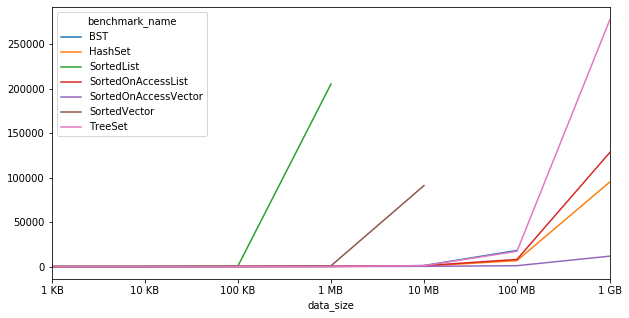

In [10]:
ax = benchmarks.plot()
plt.show()